In [56]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
df=pd.read_csv('Placement_data_full_class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [59]:
#Separate categorical and numerical data types

catvars=list(df.select_dtypes(include=['object']).columns)

numvars=list(df.select_dtypes(include=['int32','int64','float32','float64']).columns)

print(catvars)
print(numvars)

['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']
['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']


In [60]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

**Handling null Values**

In [61]:
df.shape

(215, 15)

In [62]:
def plotdistplot(col):
    plt.figure(figsize=(15,7))
    sn.distplot(df['salary'],kde=True,hist=False,label="Actual Salary",color="orange")
    sn.distplot(df[col],kde=True,hist=False,label=col,color='black')

In [63]:
mostfreq=list(dict(df['salary'].value_counts()).items())[0]
mostfreq

(300000.0, 22)

In [64]:
df['salary'].mode()[0]

300000.0

In [65]:
df['salary_mean']=df['salary'].fillna(df['salary'].mean())
df['salary_median']=df['salary'].fillna(df['salary'].median())
df['salary_mode']=df['salary'].fillna(df['salary'].mode())[0]
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,salary_mean,salary_median,salary_mode
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,270000.000000,270000.0,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,200000.000000,200000.0,270000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,250000.000000,250000.0,270000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN,288655.405405,265000.0,270000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,425000.000000,425000.0,270000.0


C:\Users\abhij\AppData\Local\Temp\ipykernel_22728\3403868028.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df['salary'],kde=True,hist=False,label="Actual Salary",color="orange")
C:\Users\abhij\AppData\Local\Temp\ipykernel_22728\3403868028.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe575

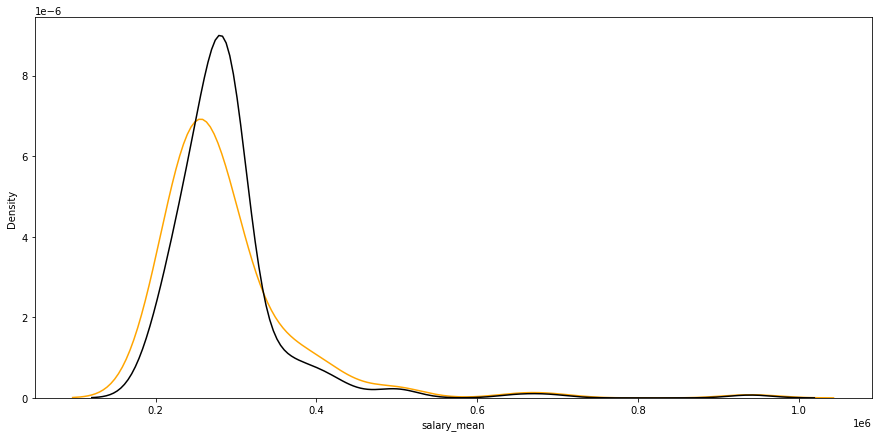

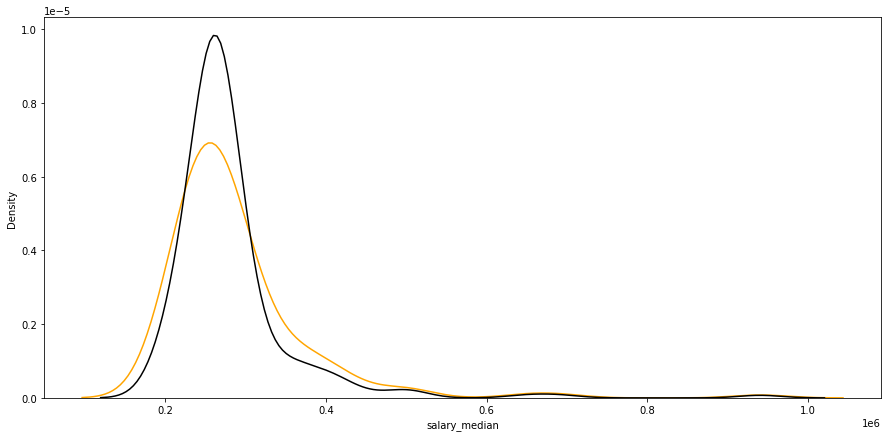

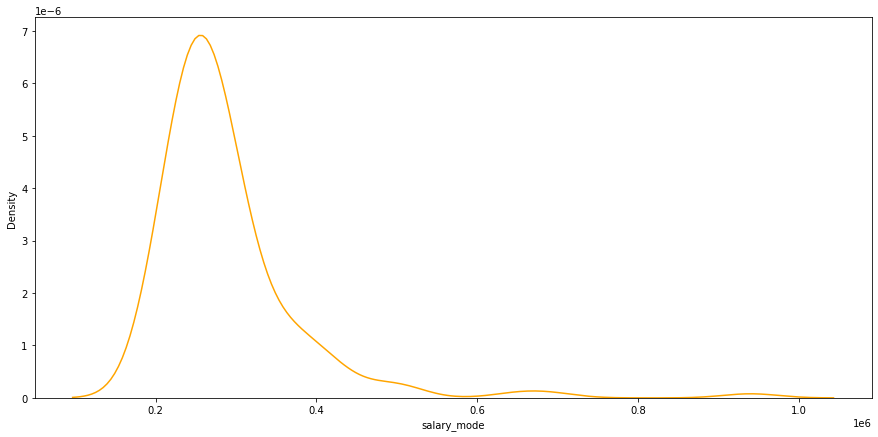

In [66]:
sallist=['salary_mean','salary_median','salary_mode']
for sal in sallist:
    plotdistplot(sal)

There is very less deviation of mean from the original salary. Whereas for median we have very large deviation but for mode we have only one value that is 300000 and filling 67 with such a high value will give incorrect prediction

In [67]:
#Filling null values with mean
df['salary']=df['salary'].fillna(df['salary'].mean())
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,salary_mean,salary_median,salary_mode
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000,270000.000000,270000.0,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000,200000.000000,200000.0,270000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000,250000.000000,250000.0,270000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405,288655.405405,265000.0,270000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000,425000.000000,425000.0,270000.0


In [68]:
df=df.drop(columns=['salary_mean','salary_mode','salary_median'],axis=1)

In [69]:
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

**EDA**

<AxesSubplot:xlabel='status', ylabel='count'>

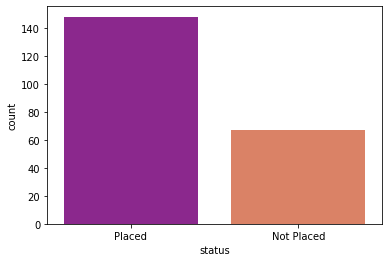

In [70]:
sn.countplot(data=df, x='status', palette='plasma')

Count Plot for feature gender is shown below


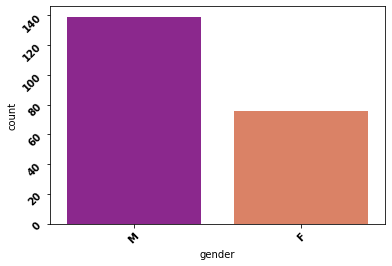

Count Plot for feature ssc_b is shown below


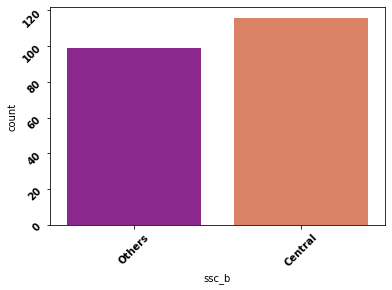

Count Plot for feature hsc_b is shown below


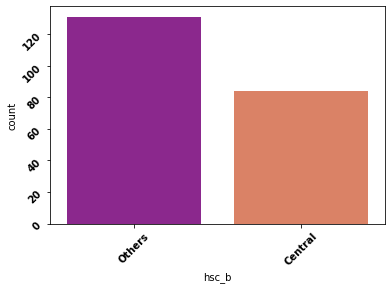

Count Plot for feature hsc_s is shown below


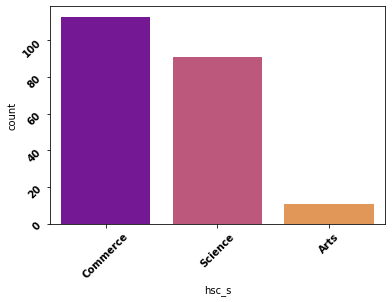

Count Plot for feature degree_t is shown below


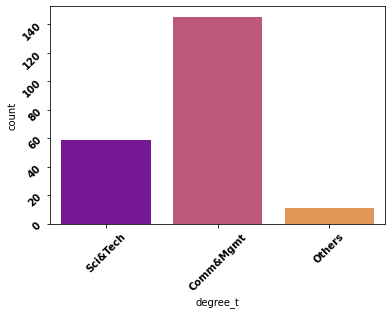

Count Plot for feature workex is shown below


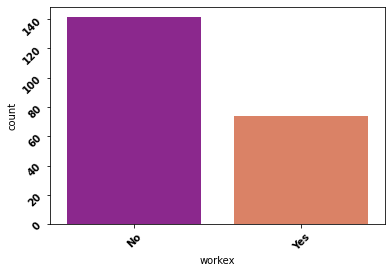

Count Plot for feature specialisation is shown below


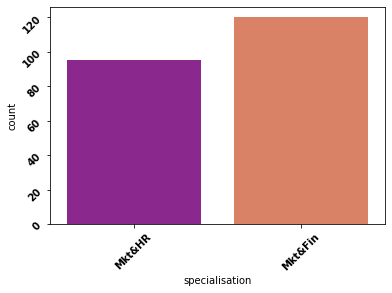

Count Plot for feature status is shown below


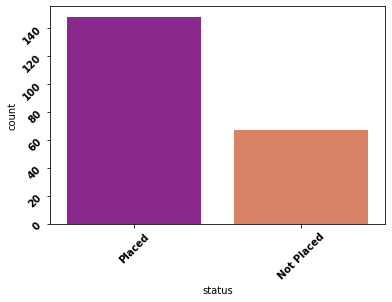

In [71]:
def valuecount(col):
    return dict(df[col].value_counts())
def getcountplot(col):
    sn.countplot(data=df,x=col,palette='plasma')
    plt.xticks(rotation='45',fontweight='bold',fontsize='10')
    plt.yticks(rotation='45',fontweight='bold',fontsize='10')
    plt.show()
for col in catvars:
    print(f'Count Plot for feature {col} is shown below')
    getcountplot(col)
    print('='*75)

Our nummerical values are mostly decimal values so no ordinality is present between them.

In [72]:
getfinaldict={}
for col in catvars:
    getfinaldict[col]=valuecount(col)

getfinaldict

{'gender': {'M': 139, 'F': 76},
 'ssc_b': {'Central': 116, 'Others': 99},
 'hsc_b': {'Others': 131, 'Central': 84},
 'hsc_s': {'Commerce': 113, 'Science': 91, 'Arts': 11},
 'degree_t': {'Comm&Mgmt': 145, 'Sci&Tech': 59, 'Others': 11},
 'workex': {'No': 141, 'Yes': 74},
 'specialisation': {'Mkt&Fin': 120, 'Mkt&HR': 95},
 'status': {'Placed': 148, 'Not Placed': 67}}

In [73]:
#top science students placed(using double query)
df[(df['degree_t']=='Sci&Tech') &(df['status']=='Placed')].sort_values(by='salary',ascending=False).reset_index().head(10)

,index,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,150,151,M,71.00,Central,58.66,Central,Science,58.00,Sci&Tech,Yes,56.0,Mkt&Fin,61.30,Placed,690000.0
1,77,78,M,64.00,Others,80.00,Others,Science,65.00,Sci&Tech,Yes,69.0,Mkt&Fin,57.65,Placed,500000.0
2,163,164,M,63.00,Others,67.00,Others,Science,64.00,Sci&Tech,No,75.0,Mkt&Fin,66.46,Placed,500000.0
3,174,175,M,73.24,Others,50.83,Others,Science,64.27,Sci&Tech,Yes,64.0,Mkt&Fin,66.23,Placed,500000.0
4,53,54,M,80.00,Others,70.00,Others,Science,72.00,Sci&Tech,No,87.0,Mkt&HR,71.04,Placed,450000.0
5,39,40,M,81.00,Others,68.00,Others,Science,64.00,Sci&Tech,No,93.0,Mkt&Fin,62.56,Placed,411000.0
6,145,146,M,89.40,Others,65.66,Others,Science,71.25,Sci&Tech,No,72.0,Mkt&HR,63.23,Placed,400000.0
7,128,129,M,80.40,Central,73.40,Central,Science,77.72,Sci&Tech,Yes,81.2,Mkt&HR,76.26,Placed,400000.0
8,24,25,M,76.50,Others,97.70,Others,Science,78.86,Sci&Tech,No,97.4,Mkt&Fin,74.01,Placed,360000.0
9,70,71,M,82.00,Others,61.00,Others,Science,62.00,Sci&Tech,No,89.0,Mkt&Fin,65.45,Placed,360000.0


In [74]:
df[(df['degree_t']=='Comm&Mgmt') &(df['status']=='Placed')].sort_values(by='salary',ascending=False).reset_index().head(10)

,index,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,119,120,M,60.80,Central,68.40,Central,Commerce,64.6,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0
1,177,178,F,73.00,Central,97.00,Others,Commerce,79.0,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,Placed,650000.0
2,4,5,M,85.80,Central,73.60,Central,Commerce,73.3,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
3,95,96,M,73.00,Central,78.00,Others,Commerce,65.0,Comm&Mgmt,Yes,95.46,Mkt&Fin,62.16,Placed,420000.0
4,210,211,M,80.60,Others,82.00,Others,Commerce,77.6,Comm&Mgmt,No,91.00,Mkt&Fin,74.49,Placed,400000.0
5,85,86,F,83.84,Others,89.83,Others,Commerce,77.2,Comm&Mgmt,Yes,78.74,Mkt&Fin,76.18,Placed,400000.0
6,21,22,F,79.00,Others,76.00,Others,Commerce,85.0,Comm&Mgmt,No,95.00,Mkt&Fin,69.06,Placed,393000.0
7,101,102,M,63.00,Central,72.00,Central,Commerce,68.0,Comm&Mgmt,No,78.00,Mkt&HR,60.44,Placed,380000.0
8,57,58,M,68.00,Central,76.00,Central,Commerce,74.0,Comm&Mgmt,No,80.00,Mkt&Fin,63.59,Placed,360000.0
9,104,105,M,69.00,Central,63.00,Others,Science,65.0,Comm&Mgmt,Yes,55.00,Mkt&HR,58.23,Placed,360000.0


In [75]:
#min and max salary
#observation: max salary 9,40,000 and min salary is 2,00,000
df[(df['salary']==max(df['salary'])) | (df['salary']==min(df['salary']))].reset_index()

,index,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
1,15,16,F,65.00,Central,75.00,Central,Commerce,69.00,Comm&Mgmt,Yes,72.00,Mkt&Fin,64.66,Placed,200000.0
2,44,45,F,77.00,Others,73.00,Others,Commerce,81.00,Comm&Mgmt,Yes,89.00,Mkt&Fin,69.70,Placed,200000.0
3,50,51,F,75.20,Central,73.20,Central,Science,68.40,Comm&Mgmt,No,65.00,Mkt&HR,62.98,Placed,200000.0
4,107,108,M,82.00,Others,90.00,Others,Commerce,83.00,Comm&Mgmt,No,80.00,Mkt&HR,73.52,Placed,200000.0
5,119,120,M,60.80,Central,68.40,Central,Commerce,64.60,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0
6,135,136,F,72.00,Central,56.00,Others,Science,69.00,Comm&Mgmt,No,55.60,Mkt&HR,65.63,Placed,200000.0


In [76]:
#students with salary package more than avg salary package of sc and tech dept
df[(df['degree_t']=='Sci&Tech')&(df['salary']>df['salary'].mean())].sort_values(by='salary',ascending=False).reset_index()

,index,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,150,151,M,71.00,Central,58.66,Central,Science,58.00,Sci&Tech,Yes,56.00,Mkt&Fin,61.30,Placed,690000.0
1,174,175,M,73.24,Others,50.83,Others,Science,64.27,Sci&Tech,Yes,64.00,Mkt&Fin,66.23,Placed,500000.0
2,77,78,M,64.00,Others,80.00,Others,Science,65.00,Sci&Tech,Yes,69.00,Mkt&Fin,57.65,Placed,500000.0
3,163,164,M,63.00,Others,67.00,Others,Science,64.00,Sci&Tech,No,75.00,Mkt&Fin,66.46,Placed,500000.0
4,53,54,M,80.00,Others,70.00,Others,Science,72.00,Sci&Tech,No,87.00,Mkt&HR,71.04,Placed,450000.0
5,39,40,M,81.00,Others,68.00,Others,Science,64.00,Sci&Tech,No,93.00,Mkt&Fin,62.56,Placed,411000.0
6,145,146,M,89.40,Others,65.66,Others,Science,71.25,Sci&Tech,No,72.00,Mkt&HR,63.23,Placed,400000.0
7,128,129,M,80.40,Central,73.40,Central,Science,77.72,Sci&Tech,Yes,81.20,Mkt&HR,76.26,Placed,400000.0
8,22,23,F,69.80,Others,60.80,Others,Science,72.23,Sci&Tech,No,55.53,Mkt&HR,68.81,Placed,360000.0
9,24,25,M,76.50,Others,97.70,Others,Science,78.86,Sci&Tech,No,97.40,Mkt&Fin,74.01,Placed,360000.0


In [77]:
#students with salary package more than avg salary package of commerce and mgmt
df[(df['degree_t']=='Comm&Mgmt')&(df['salary']>df['salary'].mean())].sort_values(by='salary',ascending=False).reset_index()

,index,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,119,120,M,60.80,Central,68.40,Central,Commerce,64.60,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,940000.0
1,177,178,F,73.00,Central,97.00,Others,Commerce,79.00,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,Placed,650000.0
2,4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
3,95,96,M,73.00,Central,78.00,Others,Commerce,65.00,Comm&Mgmt,Yes,95.46,Mkt&Fin,62.16,Placed,420000.0
4,85,86,F,83.84,Others,89.83,Others,Commerce,77.20,Comm&Mgmt,Yes,78.74,Mkt&Fin,76.18,Placed,400000.0
5,210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.00,Mkt&Fin,74.49,Placed,400000.0
6,21,22,F,79.00,Others,76.00,Others,Commerce,85.00,Comm&Mgmt,No,95.00,Mkt&Fin,69.06,Placed,393000.0
7,101,102,M,63.00,Central,72.00,Central,Commerce,68.00,Comm&Mgmt,No,78.00,Mkt&HR,60.44,Placed,380000.0
8,104,105,M,69.00,Central,63.00,Others,Science,65.00,Comm&Mgmt,Yes,55.00,Mkt&HR,58.23,Placed,360000.0
9,57,58,M,68.00,Central,76.00,Central,Commerce,74.00,Comm&Mgmt,No,80.00,Mkt&Fin,63.59,Placed,360000.0


In [78]:
df.groupby(['degree_t'])['status'].count()

degree_t
Comm&Mgmt    145
Others        11
Sci&Tech      59
Name: status, dtype: int64

<AxesSubplot:xlabel='degree_t'>

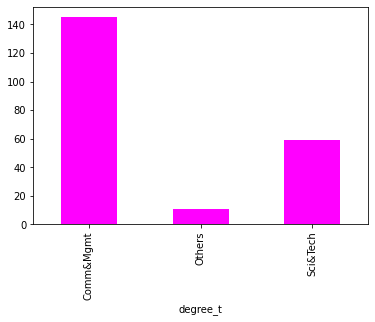

In [79]:
#max studens placed are from Mnagement
df.groupby(['degree_t'])['status'].count().plot(kind='bar',color='magenta')

<AxesSubplot:xlabel='specialisation'>

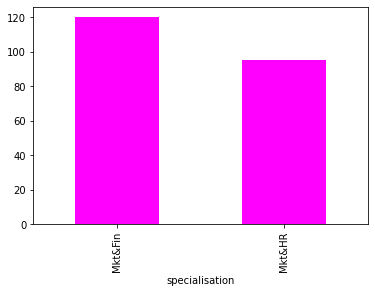

In [80]:
df.groupby(['specialisation'])['status'].count().plot(kind='bar',color='magenta')

In [81]:
df.groupby(['specialisation'])['status'].count()

specialisation
Mkt&Fin    120
Mkt&HR      95
Name: status, dtype: int64

In [82]:
df.groupby(['gender'])['status'].count()

gender
F     76
M    139
Name: status, dtype: int64

<AxesSubplot:ylabel='status'>

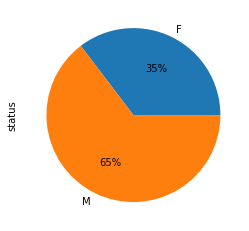

In [83]:
#females placed 35% and males 65%
df.groupby(['gender'])['status'].count().plot(kind='pie',autopct='%1.0f%%')

In [84]:
temp=df[df['gender']=='F']
temp[temp['salary']==max(temp['salary'])].style.background_gradient(cmap='plasma')

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
177,178,F,73.000000,Central,97.000000,Others,Commerce,79.000000,Comm&Mgmt,Yes,89.000000,Mkt&Fin,70.810000,Placed,650000.000000


In [85]:
#status of hsc_s or stream column
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000


<AxesSubplot:ylabel='status'>

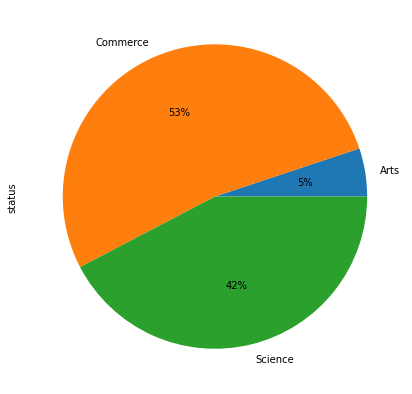

In [86]:
df.groupby(['hsc_s'])['status'].count().plot(kind='pie',autopct='%1.0f%%',figsize=(15,7))

In [87]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000


In [88]:
getfinaldict

{'gender': {'M': 139, 'F': 76},
 'ssc_b': {'Central': 116, 'Others': 99},
 'hsc_b': {'Others': 131, 'Central': 84},
 'hsc_s': {'Commerce': 113, 'Science': 91, 'Arts': 11},
 'degree_t': {'Comm&Mgmt': 145, 'Sci&Tech': 59, 'Others': 11},
 'workex': {'No': 141, 'Yes': 74},
 'specialisation': {'Mkt&Fin': 120, 'Mkt&HR': 95},
 'status': {'Placed': 148, 'Not Placed': 67}}

In [89]:
len(getfinaldict['status']),len(getfinaldict['degree_t'])

(2, 3)

**Label Encoding**

In [90]:
from sklearn.preprocessing import LabelEncoder

def get_mappings(df, columns_to_encode):
    mappings = {}

    for col in columns_to_encode:
        le = LabelEncoder()
        encoded_labels = le.fit_transform(df[col])
        mappings[col] = dict(zip(le.classes_, range(len(le.classes_))))
        df[col] = encoded_labels

    return mappings

In [91]:
columns_to_encode = catvars 
mappings = get_mappings(df, columns_to_encode)

In [92]:
for col, mapping in mappings.items():
    print(f'Mappings for {col}: {mapping}')

Mappings for gender: {'F': 0, 'M': 1}
Mappings for ssc_b: {'Central': 0, 'Others': 1}
Mappings for hsc_b: {'Central': 0, 'Others': 1}
Mappings for hsc_s: {'Arts': 0, 'Commerce': 1, 'Science': 2}
Mappings for degree_t: {'Comm&Mgmt': 0, 'Others': 1, 'Sci&Tech': 2}
Mappings for workex: {'No': 0, 'Yes': 1}
Mappings for specialisation: {'Mkt&Fin': 0, 'Mkt&HR': 1}
Mappings for status: {'Not Placed': 0, 'Placed': 1}


In [93]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.000000
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.000000
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.000000
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,288655.405405
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.000000
211,212,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.000000
212,213,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.000000
213,214,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.000000


In [94]:
df=df.drop(['sl_no'],axis=1)

**Numerical Columns EDA**

In [95]:
numvars

['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [96]:
numvars[1:]

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

Distribution plots for col: ssc_p are shown:


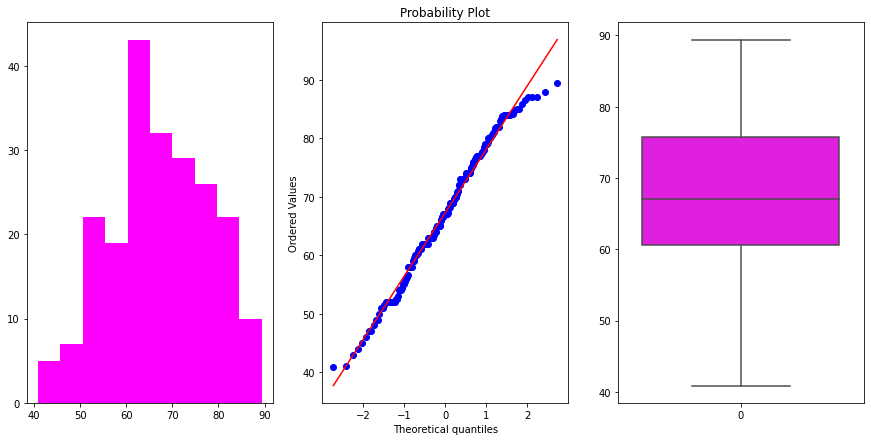

Distribution plots for col: hsc_p are shown:


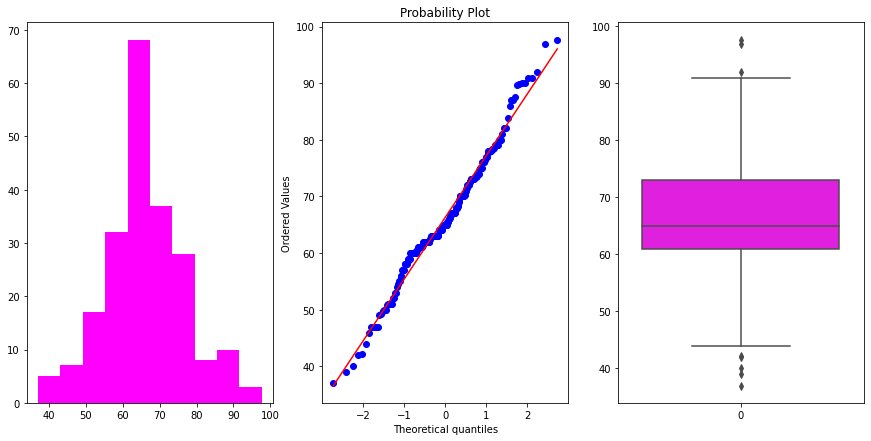

Distribution plots for col: degree_p are shown:


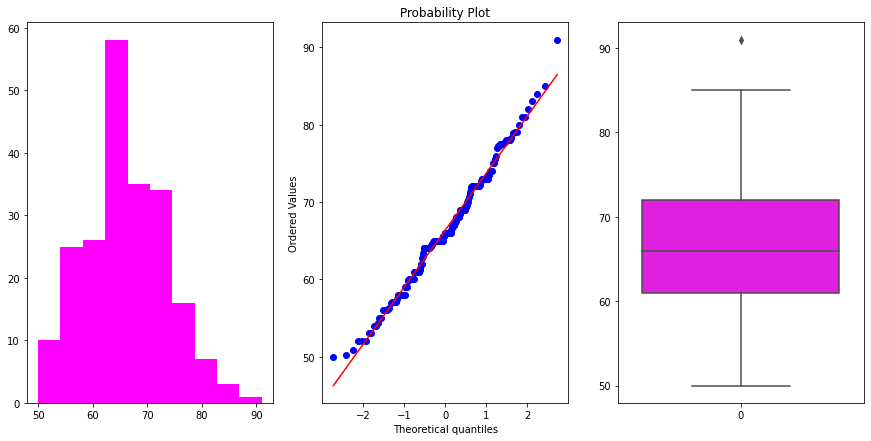

Distribution plots for col: etest_p are shown:


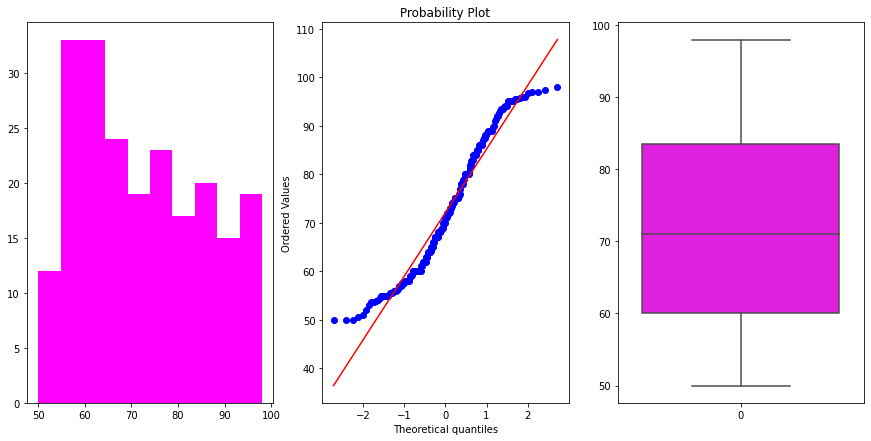

Distribution plots for col: mba_p are shown:


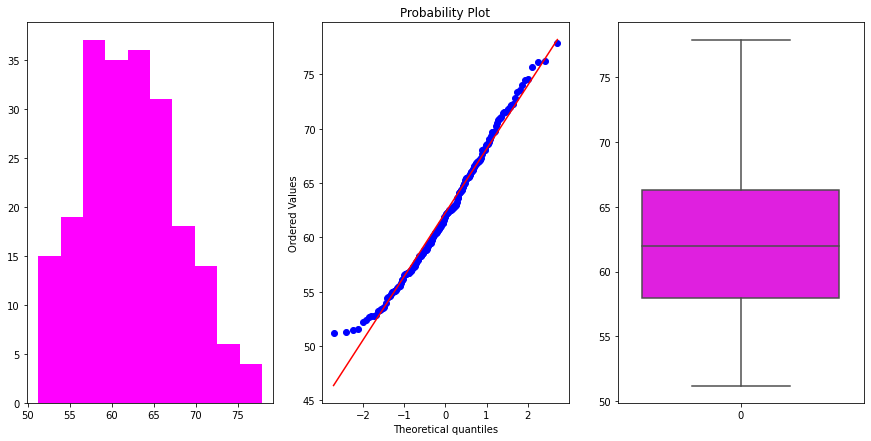

Distribution plots for col: salary are shown:


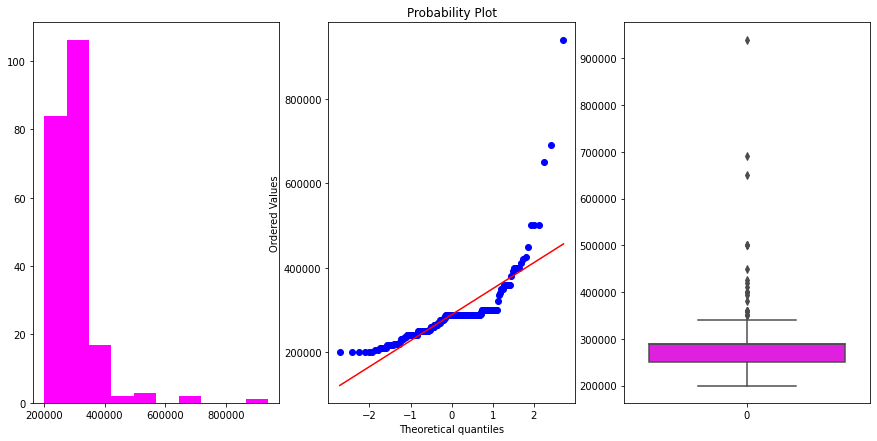

In [97]:
import scipy.stats as stats
def getplot(df,col):
    plt.figure(figsize=(15,7))
    plt.subplot(1,3,1)
    plt.hist(df[col],color='magenta')

    plt.subplot(1,3,2)
    stats.probplot(df[col],dist='norm',plot=plt)

    plt.subplot(1,3,3)
    sn.boxplot(df[col],color='magenta')

    plt.show()

for col in numvars[1:]:
    print(f'Distribution plots for col: {col} are shown:')
    getplot(df,col)
    print('='*75)

**Feature Selection**

<AxesSubplot:>

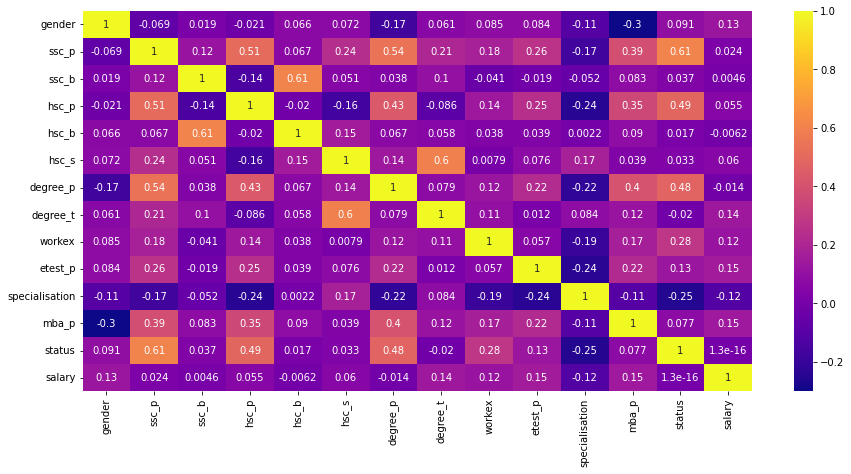

In [98]:
plt.figure(figsize=(15,7))
sn.heatmap(df.corr(),annot=True,cmap='plasma')

No special or special corr is happening so we will continue like this.

In [99]:
'''
We will drop the salary column as it doesn't play any role in placements
'''

data=df.copy()
test=data['status']    #independent feature
train=data.drop(['status','salary'],axis =1)    #dependent feature
train.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50


In [100]:
#Extratress classifier is a feature selection technique
from sklearn.ensemble import ExtraTreesClassifier
ec=ExtraTreesClassifier()
ec.fit(train,test)

ExtraTreesClassifier()

<AxesSubplot:>

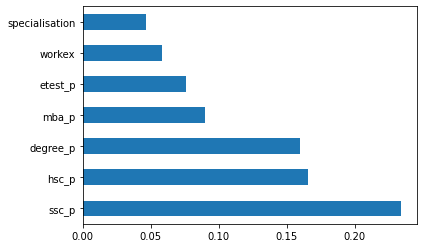

In [101]:
featbar=pd.Series(ec.feature_importances_,index=train.columns)
featbar.nlargest(7).plot(kind='barh')

<AxesSubplot:ylabel='None'>

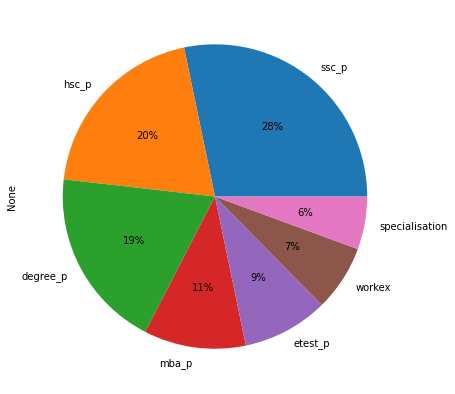

In [102]:
featbar.nlargest(7).plot(kind='pie',autopct='%1.0f%%',figsize=(15,7))

<AxesSubplot:>

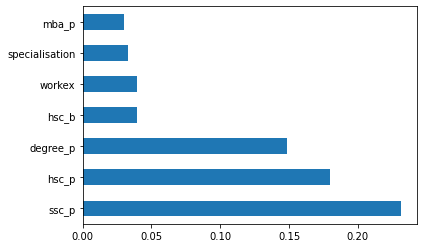

In [103]:
#mutual cassifier
from sklearn.feature_selection import mutual_info_classif
mc=mutual_info_classif(train,test)
ax=pd.Series(mc,index=train.columns)
ax.nlargest(7).plot(kind='barh')

<AxesSubplot:ylabel='None'>

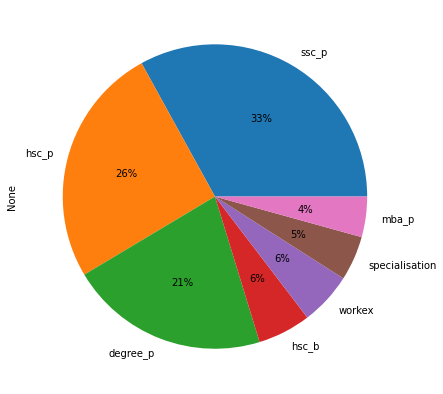

In [104]:
ax.nlargest(7).plot(kind='pie',autopct='%1.0f%%',figsize=(15,7))

In [105]:
'''
We select top 10 cases that are important from both classifiers and take 
intersection for better performance
'''
featcol=list(featbar.nlargest(10).index) #feat
mutclassif=list(ax.nlargest(10).index)
commomcols=list(set(featcol).intersection(set(mutclassif)))
print(commomcols)

['ssc_p', 'hsc_p', 'workex', 'degree_p', 'mba_p', 'specialisation', 'gender', 'degree_t']


In [106]:
#we change the dependent variable to the top 10 common columns
train=df[commomcols] #new dependent variable
train.head()

,ssc_p,hsc_p,workex,degree_p,mba_p,specialisation,gender,degree_t
0,67.00,91.00,0,58.00,58.80,1,1,2
1,79.33,78.33,1,77.48,66.28,0,1,2
2,65.00,68.00,0,64.00,57.80,0,1,0
3,56.00,52.00,0,52.00,59.43,1,1,2
4,85.80,73.60,0,73.30,55.50,0,1,0


In [107]:
'''
from the above we notice that gender, specialization, degree_t,workex are the categorical columns .For any
placement students are filtered on the basis of their boards ,sem marks and workexp ,specialization
so our exploration is correct.
'''


'\nfrom the above we notice that gender, specialization, degree_t,workex are the categorical columns .For any\nplacement students are filtered on the basis of their boards ,sem marks and workexp ,specialization\nso our exploration is correct.\n'

In [108]:
train=train[['gender','specialisation','degree_t','workex','ssc_p','hsc_p','degree_p','mba_p']]
train.columns=['Gender','Specialisation','Technical Degree','Work Experience','SSC_p','High School_p','Degree_p','MBA_p']
train.head()

,Gender,Specialisation,Technical Degree,Work Experience,SSC_p,High School_p,Degree_p,MBA_p
0,1,1,2,0,67.00,91.00,58.00,58.80
1,1,0,2,1,79.33,78.33,77.48,66.28
2,1,0,0,0,65.00,68.00,64.00,57.80
3,1,1,2,0,56.00,52.00,52.00,59.43
4,1,0,0,0,85.80,73.60,73.30,55.50


In [109]:
train['Technical Degree'].value_counts()

0    145
2     59
1     11
Name: Technical Degree, dtype: int64

**Model building**

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score
from sklearn import metrics

In [111]:
X_train,X_test,y_train,y_test=train_test_split(train,test,test_size=0.2)
X_train.shape,X_test.shape

((172, 8), (43, 8))

[Text(0.4393939393939394, 0.9444444444444444, 'SSC_p <= 62.5\ngini = 0.443\nsamples = 172\nvalue = [57, 115]\nclass = Placed'),
 Text(0.18181818181818182, 0.8333333333333334, 'High School_p <= 58.5\ngini = 0.388\nsamples = 57\nvalue = [42, 15]\nclass = Not_placed'),
 Text(0.15151515151515152, 0.7222222222222222, 'gini = 0.0\nsamples = 25\nvalue = [25, 0]\nclass = Not_placed'),
 Text(0.21212121212121213, 0.7222222222222222, 'Degree_p <= 64.405\ngini = 0.498\nsamples = 32\nvalue = [17, 15]\nclass = Not_placed'),
 Text(0.15151515151515152, 0.6111111111111112, 'High School_p <= 63.5\ngini = 0.434\nsamples = 22\nvalue = [15, 7]\nclass = Not_placed'),
 Text(0.12121212121212122, 0.5, 'SSC_p <= 57.14\ngini = 0.486\nsamples = 12\nvalue = [5, 7]\nclass = Placed'),
 Text(0.06060606060606061, 0.3888888888888889, 'Work Experience <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = Not_placed'),
 Text(0.030303030303030304, 0.2777777777777778, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = N

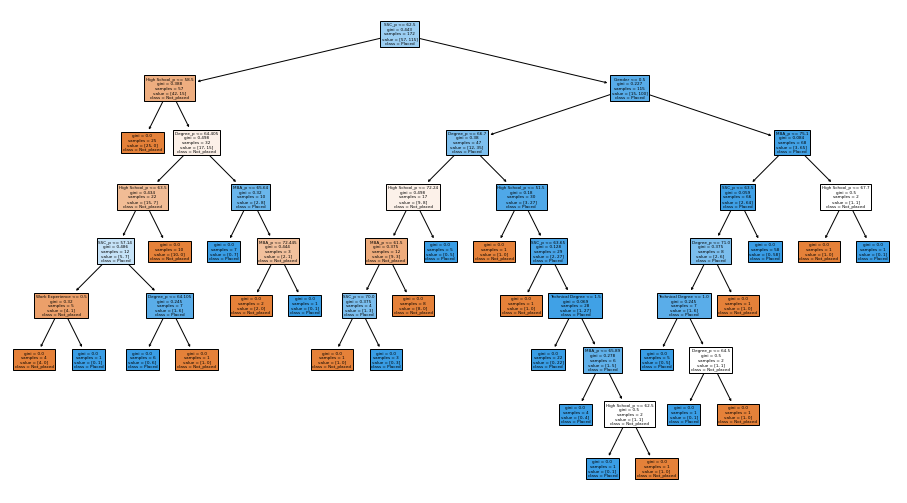

In [112]:
dc=DecisionTreeClassifier()
dc.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(dc,filled=True,class_names=['Not_placed','Placed'],feature_names=train.columns)

In [113]:
costpath=dc.cost_complexity_pruning_path(train,test)
ccp_alpha,impurities=costpath.ccp_alphas,costpath.impurities

In [114]:
modellist=[]
for alpha in ccp_alpha:
    dc=DecisionTreeClassifier(ccp_alpha=alpha)
    dc.fit(X_train,y_train)
    modellist.append(dc)

In [116]:
modellist

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=0.004228329809725159),
 DecisionTreeClassifier(ccp_alpha=0.004228329809725159),
 DecisionTreeClassifier(ccp_alpha=0.004263565891472868),
 DecisionTreeClassifier(ccp_alpha=0.004341085271317831),
 DecisionTreeClassifier(ccp_alpha=0.004734354320287392),
 DecisionTreeClassifier(ccp_alpha=0.006208968510070101),
 DecisionTreeClassifier(ccp_alpha=0.0069767441860465115),
 DecisionTreeClassifier(ccp_alpha=0.008268733850129198),
 DecisionTreeClassifier(ccp_alpha=0.011780676876536203),
 DecisionTreeClassifier(ccp_alpha=0.011853417899929527),
 DecisionTreeClassifier(ccp_alpha=0.011954099636020114),
 DecisionTreeClassifier(ccp_alpha=0.014345049677053412),
 DecisionTreeClassifier(ccp_alpha=0.015221987315010573),
 DecisionTreeClassifier(ccp_alpha=0.019633565458658242),
 DecisionTreeClassifier(ccp_alpha=0.043543939616998095),
 DecisionTreeClassifier(ccp_alpha=0.14599558360017162)]

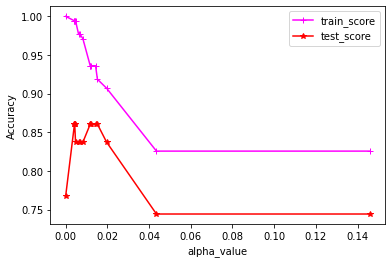

In [115]:
train_score=[clf.score(X_train,y_train)for clf in modellist]
test_score=[clf.score(X_test,y_test)for clf in modellist]

plt.xlabel('alpha_value')
plt.ylabel('Accuracy')
plt.plot(ccp_alpha,train_score,label='train_score',marker='+',color='magenta')
plt.plot(ccp_alpha,test_score,label='test_score',marker='*',color='red')
plt.legend()
plt.show()

[Text(0.5, 0.9, 'SSC_p <= 62.5\ngini = 0.443\nsamples = 172\nvalue = [57, 115]\nclass = Placed'),
 Text(0.2, 0.7, 'High School_p <= 58.5\ngini = 0.388\nsamples = 57\nvalue = [42, 15]\nclass = Not_placed'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 25\nvalue = [25, 0]\nclass = Not_placed'),
 Text(0.3, 0.5, 'Degree_p <= 64.405\ngini = 0.498\nsamples = 32\nvalue = [17, 15]\nclass = Not_placed'),
 Text(0.2, 0.3, 'High School_p <= 63.5\ngini = 0.434\nsamples = 22\nvalue = [15, 7]\nclass = Not_placed'),
 Text(0.1, 0.1, 'gini = 0.486\nsamples = 12\nvalue = [5, 7]\nclass = Placed'),
 Text(0.3, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]\nclass = Not_placed'),
 Text(0.4, 0.3, 'gini = 0.32\nsamples = 10\nvalue = [2, 8]\nclass = Placed'),
 Text(0.8, 0.7, 'Gender <= 0.5\ngini = 0.227\nsamples = 115\nvalue = [15, 100]\nclass = Placed'),
 Text(0.7, 0.5, 'Degree_p <= 66.7\ngini = 0.38\nsamples = 47\nvalue = [12, 35]\nclass = Placed'),
 Text(0.6, 0.3, 'High School_p <= 72.24\ngini = 0.498\nsamples = 

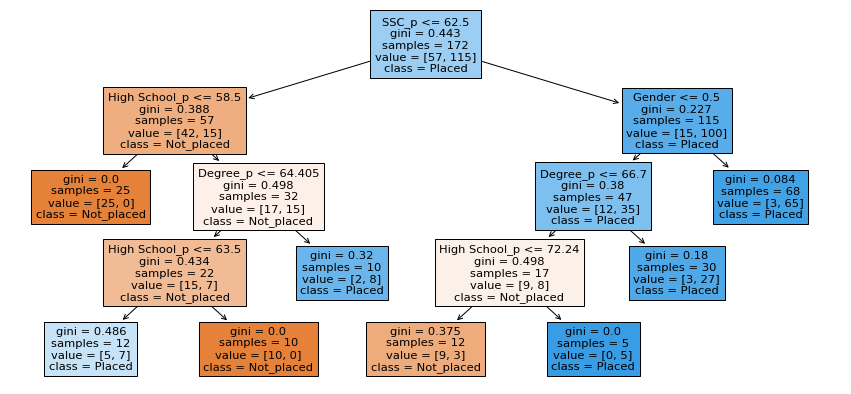

In [117]:
dc=DecisionTreeClassifier(ccp_alpha=0.0195)
dc.fit(X_train,y_train)
plt.figure(figsize=(15,7))
tree.plot_tree(dc,filled=True,class_names=['Not_placed','Placed'],feature_names=train.columns)

**Hyperparameter Tuning**

In [118]:
params={
'RandomForest':{
    'model':RandomForestClassifier(),
    'params':{
        'n_estimators':[int(x) for x in np.linspace(start=1,stop=1200,num=10)],
        'max_depth':[int(x) for x in np.linspace(start=1,stop=30,num=5)],
        'min_samples_split':[2,5,10,12],
        'min_samples_leaf':[2,5,10,12],
        'max_features':['auto','sqrt'],
        'ccp_alpha':[0.0185,0.0190,0.0195,0.0200],
    }

},
'logistic':{
    'model':LogisticRegression(),
    'params':{
        'penalty':['l1','l2','elasticnet'],
        'C':[0.25,0.50,0.75,1.0],
        'tol':[1e-10,1e-5,1e-3,0.25,0.50],
        'solver':['lbfgs','liblinear','saga','newton-cg'],
        'multi_class':['auto','ovr','multinomial'],
        'max_iter':[int(x) for x in np.linspace(start=1,stop=250,num=10)]
    }
},
'D-tree':{
    'model':DecisionTreeClassifier(),
    'params':{
        'criterion':['gini','entropy'],
        'splitter':['best','random'],
        'min_samples_split':[1,2,5,10,12],
        'min_samples_leaf':[1,2,5,10,12],
        'max_features':['auto','sqrt'],
        'ccp_alpha':[0.0185,0.0190,0.0195,0.0200],
    }
}
}

In [119]:
scores=[]
for model_name,mp in params.items():
    clf=RandomizedSearchCV(mp['model'],param_distributions=mp['params'],cv=5,n_iter=10,n_jobs=1,scoring='accuracy')
    clf.fit(X_train,y_train)
    scores.append({
        'model_name':model_name,
        'best_score':clf.best_score_,
        'best_estimator':clf.best_estimator_
    })

c:\Users\abhij\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\abhij\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\abhij\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicit

In [120]:
scores_df=pd.DataFrame(data=scores,columns=['model_name','best_score','best_estimator'])
scores_df.head()

,model_name,best_score,best_estimator
0,RandomForest,0.854286,"(DecisionTreeClassifier(ccp_alpha=0.0185, max_..."
1,logistic,0.866218,"LogisticRegression(C=0.5, max_iter=139, multi_..."
2,D-tree,0.801681,"DecisionTreeClassifier(ccp_alpha=0.019, max_fe..."


In [123]:
scores

[{'model_name': 'RandomForest',
  'best_score': 0.8542857142857141,
  'best_estimator': RandomForestClassifier(ccp_alpha=0.0185, max_depth=15, max_features='auto',
                         min_samples_leaf=2, min_samples_split=12,
                         n_estimators=800)},
 {'model_name': 'logistic',
  'best_score': 0.8662184873949579,
  'best_estimator': LogisticRegression(C=0.5, max_iter=139, multi_class='ovr', solver='liblinear',
                     tol=1e-10)},
 {'model_name': 'D-tree',
  'best_score': 0.8016806722689076,
  'best_estimator': DecisionTreeClassifier(ccp_alpha=0.019, max_features='sqrt')}]

In [130]:
rf1=RandomForestClassifier(ccp_alpha=0.019, max_depth=12, max_features='auto',
                         min_samples_leaf=2, min_samples_split=12,
                         n_estimators=533)
rf1.fit(X_train,y_train)
y_pred=rf1.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

c:\Users\abhij\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.9069767441860465


In [129]:
rf=RandomForestClassifier(max_depth=12,n_estimators=533)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.8604651162790697


#Flux from 86% -90% .changing max depth and n estimators. n est=533 and depth =12 are best combination so far.

In [136]:
lr=LogisticRegression(C=10, max_iter=200, multi_class='ovr', solver='liblinear'
                     )
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.8372093023255814


we changed various values of C, max_iter but couldn't get better values than 86%

**Model Testing**

In [137]:
train

,Gender,Specialisation,Technical Degree,Work Experience,SSC_p,High School_p,Degree_p,MBA_p
0,1,1,2,0,67.00,91.00,58.00,58.80
1,1,0,2,1,79.33,78.33,77.48,66.28
2,1,0,0,0,65.00,68.00,64.00,57.80
3,1,1,2,0,56.00,52.00,52.00,59.43
4,1,0,0,0,85.80,73.60,73.30,55.50
...,...,...,...,...,...,...,...,...
210,1,0,0,0,80.60,82.00,77.60,74.49
211,1,0,2,0,58.00,60.00,72.00,53.62
212,1,0,0,1,67.00,67.00,73.00,69.72
213,0,1,0,0,74.00,66.00,58.00,60.23


In [138]:
traindata=np.array(train)
predicted=[]
for i in range(len(traindata)):
    predicted.append(rf.predict([traindata[i]]))

predicted

c:\Users\abhij\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\abhij\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\abhij\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\abhij\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\abhij\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid

[array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([1]),
 array([0]),
 array([1]),

In [139]:
resultdf=train.copy()
resultdf['Actual']=np.array(test)
resultdf['Predicted']=np.array(predicted)
resultdf.head()

,Gender,Specialisation,Technical Degree,Work Experience,SSC_p,High School_p,Degree_p,MBA_p,Actual,Predicted
0,1,1,2,0,67.00,91.00,58.00,58.80,1,1
1,1,0,2,1,79.33,78.33,77.48,66.28,1,1
2,1,0,0,0,65.00,68.00,64.00,57.80,1,1
3,1,1,2,0,56.00,52.00,52.00,59.43,0,0
4,1,0,0,0,85.80,73.60,73.30,55.50,1,1


In [140]:
resultdf['Actual'].value_counts()

1    148
0     67
Name: Actual, dtype: int64

In [141]:
resultdf['Predicted'].value_counts()

1    148
0     67
Name: Predicted, dtype: int64

In [142]:
get_mappings

<function __main__.get_mappings(df, columns_to_encode)>

**Predicted Probablity**

In [143]:
traindata=np.array(train)
predicted=[]
for i in range(len(traindata)):
    predicted.append(rf.predict_proba([traindata[i]]))

predicted

c:\Users\abhij\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\abhij\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\abhij\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\abhij\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\abhij\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid

[array([[0.11444653, 0.88555347]]),
 array([[0.00938086, 0.99061914]]),
 array([[0.0435272, 0.9564728]]),
 array([[0.99249531, 0.00750469]]),
 array([[0.00938086, 0.99061914]]),
 array([[0.85553471, 0.14446529]]),
 array([[0.81425891, 0.18574109]]),
 array([[0.01313321, 0.98686679]]),
 array([[0.00375235, 0.99624765]]),
 array([[0.7804878, 0.2195122]]),
 array([[0.20637899, 0.79362101]]),
 array([[0.00562852, 0.99437148]]),
 array([[0.95121951, 0.04878049]]),
 array([[0.08067542, 0.91932458]]),
 array([[0.94746717, 0.05253283]]),
 array([[0.01313321, 0.98686679]]),
 array([[0.04502814, 0.95497186]]),
 array([[0.89118199, 0.10881801]]),
 array([[0.8177611, 0.1822389]]),
 array([[0.12757974, 0.87242026]]),
 array([[0.15515947, 0.84484053]]),
 array([[0.01125704, 0.98874296]]),
 array([[0.53846154, 0.46153846]]),
 array([[0.1163227, 0.8836773]]),
 array([[0.0412758, 0.9587242]]),
 array([[0.93433396, 0.06566604]]),
 array([[0.00938086, 0.99061914]]),
 array([[0.10293934, 0.89706066]]),
 a

In [144]:
predicted[0][0],predicted[0][0][0],predicted[0][0][1]

(array([0.11444653, 0.88555347]), 0.11444652908067542, 0.8855534709193246)

In [145]:
resultdf['Prob_not_getting_placed']=np.array([predicted[i][0][0] for i in range(len(predicted))])
resultdf['Prob_getting_placed']=np.array([predicted[i][0][1]for i in range(len(predicted))])

In [146]:
resultdf

,Gender,Specialisation,Technical Degree,Work Experience,SSC_p,High School_p,Degree_p,MBA_p,Actual,Predicted,Prob_not_getting_placed,Prob_getting_placed
0,1,1,2,0,67.00,91.00,58.00,58.80,1,1,0.114447,0.885553
1,1,0,2,1,79.33,78.33,77.48,66.28,1,1,0.009381,0.990619
2,1,0,0,0,65.00,68.00,64.00,57.80,1,1,0.043527,0.956473
3,1,1,2,0,56.00,52.00,52.00,59.43,0,0,0.992495,0.007505
4,1,0,0,0,85.80,73.60,73.30,55.50,1,1,0.009381,0.990619
...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,0,0,0,80.60,82.00,77.60,74.49,1,1,0.037523,0.962477
211,1,0,2,0,58.00,60.00,72.00,53.62,1,1,0.296435,0.703565
212,1,0,0,1,67.00,67.00,73.00,69.72,1,1,0.022514,0.977486
213,0,1,0,0,74.00,66.00,58.00,60.23,1,1,0.131707,0.868293


**Saving and importing Model**

In [147]:
import pickle
file=open('campusplacementpredictor.pkl','wb')
pickle.dump(rf,file)
file.close()

In [ ]:
#All records 